<a href="https://colab.research.google.com/github/yeoncw1226/2024_2_dataScienceProject_team5/blob/main/police_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("경찰서_integrated_20.csv", encoding='euc-kr')

In [ ]:
df.columns

Index(['police_location', 'police_20', 'police', 'population_20', 'saftey_20'], dtype='object')

In [ ]:
df['new_police'] = df['police_20'] / df['population_20'] * 10000

In [ ]:
nan_rows = df[df['new_police'].isna()]

print(nan_rows)

Empty DataFrame
Columns: [police_location, police_20, police, population_20, saftey_20, new_police]
Index: []


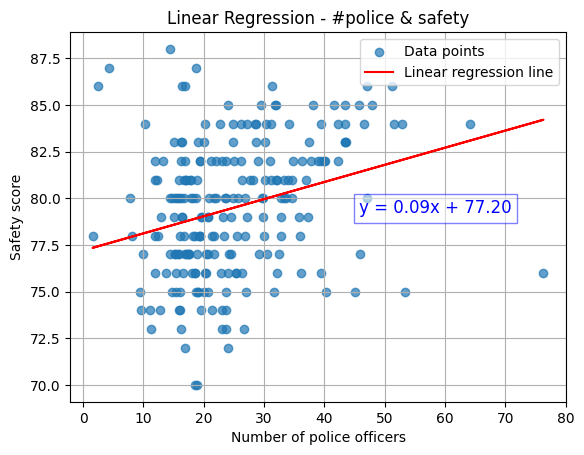

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['new_police'].values.reshape(-1, 1)
y = df['saftey_20'].values
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_
equation = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(df['new_police'], df['saftey_20'], alpha=0.7, label="Data points")
plt.plot(df['new_police'], y_pred, color='red', label="Linear regression line")

plt.text(
    x=max(df['new_police']) * 0.6,
    y=max(df['saftey_20']) * 0.9,
    s=equation,
    color="blue",
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5, edgecolor="blue")
)


plt.xlabel("Number of police officers")
plt.ylabel("Safety score")
plt.title("Linear Regression - #police & safety")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
sample_size = len(df)
sample_size = df.shape[0]

print(f"Sample size: {sample_size}")

Sample size: 222


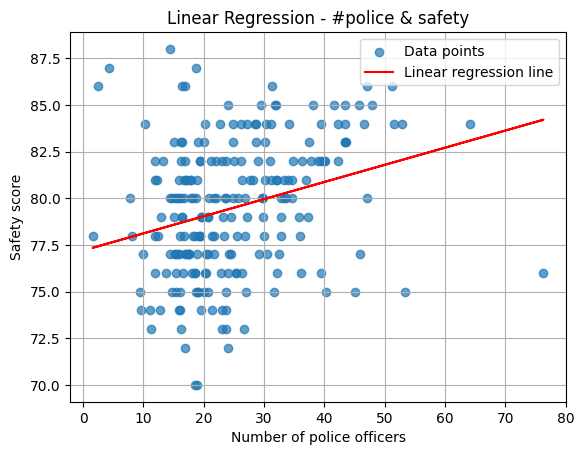

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['new_police'].values.reshape(-1, 1)
y = df['saftey_20'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(df['new_police'], df['saftey_20'], alpha=0.7, label="Data points")
plt.plot(df['new_police'], y_pred, color='red', label="Linear regression line")

plt.xlabel("Number of police officers")
plt.ylabel("Safety score")
plt.title("Linear Regression - #police & safety")
plt.grid(True)
plt.legend()

plt.show()

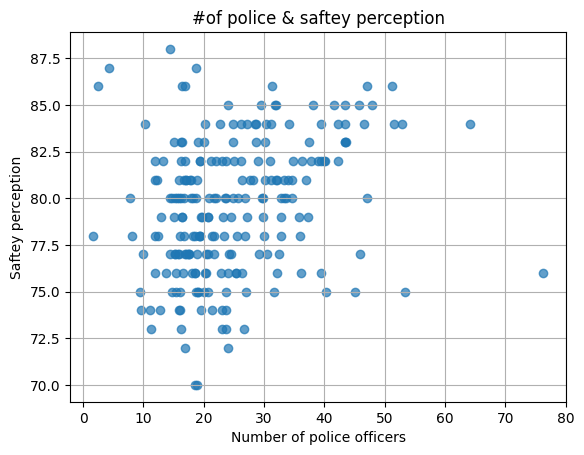

In [ ]:
plt.scatter(df['new_police'], df['saftey_20'], alpha=0.7)
plt.xlabel("Number of police officers")
plt.ylabel("Saftey perception")
plt.title("#of police & saftey perception")
plt.grid(True)
plt.show()

In [ ]:
Q1_police = df['saftey_20'].quantile(0.25)
Q3_police = df['saftey_20'].quantile(0.75)
IQR_police = Q3_police - Q1_police

Q1_safety = df['new_police'].quantile(0.25)
Q3_safety = df['new_police'].quantile(0.75)
IQR_safety = Q3_safety - Q1_safety

police_outlier_condition = (df['saftey_20'] < (Q1_police - 1.5 * IQR_police)) | (df['saftey_20'] > (Q3_police + 1.5 * IQR_police))
safety_outlier_condition = (df['new_police'] < (Q1_safety - 1.5 * IQR_safety)) | (df['new_police'] > (Q3_safety + 1.5 * IQR_safety))

outliers = df[police_outlier_condition | safety_outlier_condition]

df = df[~(police_outlier_condition | safety_outlier_condition)]
print("Outliers:")
print(outliers)

Outliers:
    police_location  police_20  police  population_20  saftey_20  new_police
58             경남의령        142     142          26864         84   52.858845
83             경북울릉         59      62           9200         84   64.130435
103            대구중부        410     413          76849         75   53.351377
121            부산중부        317     321          41547         76   76.299131


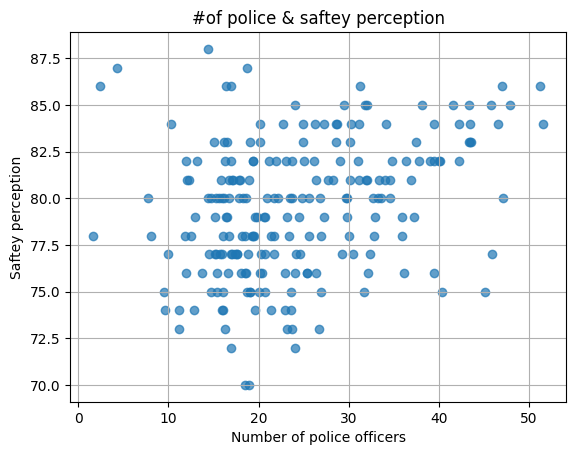

In [ ]:
plt.scatter(df['new_police'], df['saftey_20'], alpha=0.7)
plt.xlabel("Number of police officers")
plt.ylabel("Saftey perception")
plt.title("#of police & saftey perception")
plt.grid(True)
plt.show()

In [ ]:
sample_size = len(df)
sample_size = df.shape[0]

print(f"Sample size: {sample_size}")


Sample size: 218


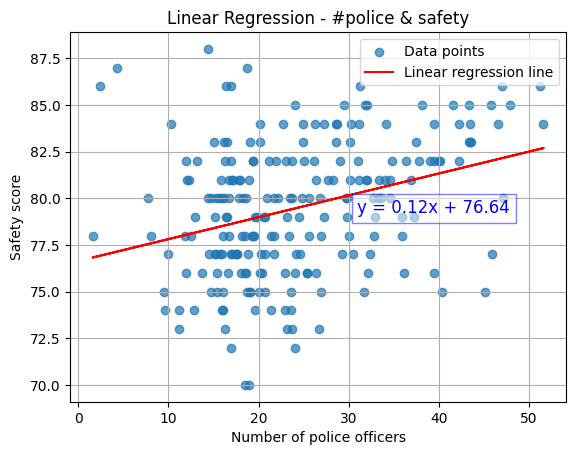

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

X = df['new_police'].values.reshape(-1, 1)
y = df['saftey_20'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_
equation = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(df['new_police'], df['saftey_20'], alpha=0.7, label="Data points")
plt.plot(df['new_police'], y_pred, color='red', label="Linear regression line")

plt.text(
    x=max(df['new_police']) * 0.6,
    y=max(df['saftey_20']) * 0.9,
    s=equation,
    color="blue",
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5, edgecolor="blue")
)

plt.xlabel("Number of police officers")
plt.ylabel("Safety score")
plt.title("Linear Regression - #police & safety")
plt.grid(True)
plt.legend()

plt.show()


In [ ]:
from scipy.stats import pearsonr
police_column = df['saftey_20']
safety_column = df['new_police']

corr, p_value = pearsonr(police_column, safety_column)

print(f"Correlation coefficient: {corr}")

p_value_formatted = "{:.10f}".format(p_value)
print(f"p-value: {p_value_formatted}")

Correlation coefficient: 0.3225777016752387
p-value: 0.0000011380


In [ ]:
median_value = df['new_police'].median()
group_1 = df[df['new_police'] <= median_value]
group_2 = df[df['new_police'] > median_value]

In [ ]:
from scipy.stats import shapiro

stat1, p1 = shapiro(group_1['new_police'])
stat2, p2 = shapiro(group_2['new_police'])

print(f"Group 1: Statistics={stat1}, p-value={p1}")
print(f"Group 2: Statistics={stat2}, p-value={p2}")


Group 1: Statistics=0.9004915295377377, p-value=6.024683173812829e-07
Group 2: Statistics=0.9297893771444555, p-value=2.275740942466166e-05


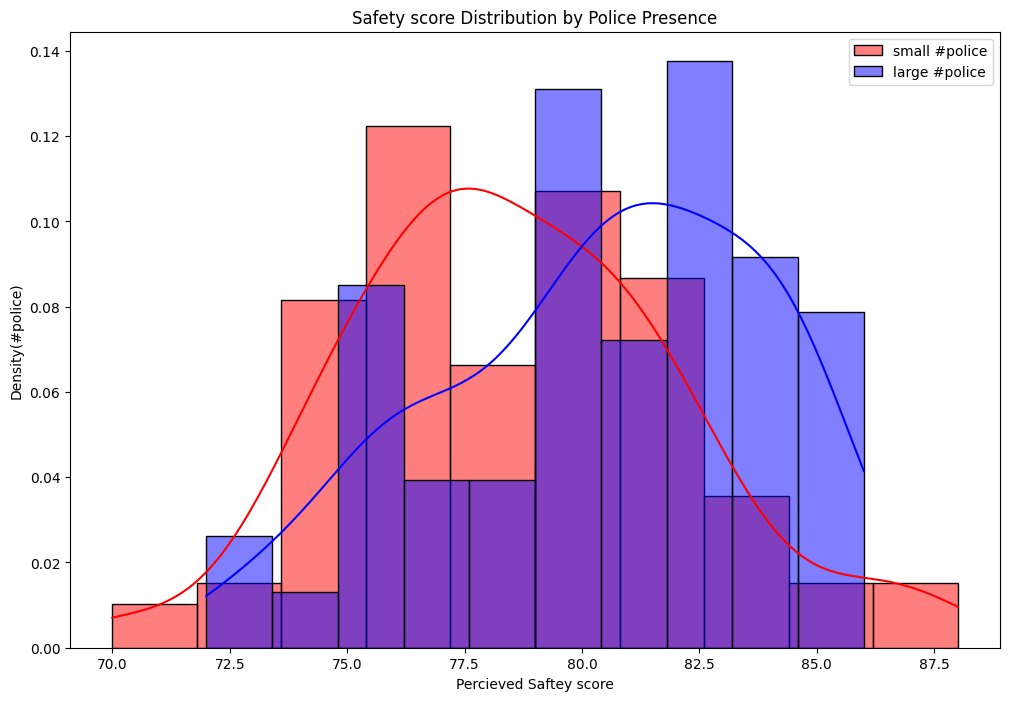

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(12,8))

sns.histplot(group_1['saftey_20'], kde=True, color="red", label="small #police", bins=10, stat="density")
sns.histplot(group_2['saftey_20'], kde=True, color="blue", label="large #police", bins=10, stat="density")

plt.title("Safety score Distribution by Police Presence")
plt.xlabel("Percieved Saftey score")
plt.ylabel("Density(#police)")
plt.legend()
plt.show()

In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(group_1['saftey_20'], group_2['saftey_20'])

p_value_formatted = "{:.10f}".format(p_value)
print(f"t-test 결과: t-statistic = {t_stat}, p-value = {p_value_formatted}")


t-test 결과: t-statistic = -3.879765391932286, p-value = 0.0001388419


In [ ]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(group_1['saftey_20'], group_2['saftey_20'])
p_value_formatted = "{:.10f}".format(p_value)
print(f"Mann-Whitney U test 결과: U-statistic = {stat}, p-value = {p_value_formatted}")

Mann-Whitney U test 결과: U-statistic = 4088.0, p-value = 0.0000658195


C:\Users\msyu7\AppData\Local\Temp\ipykernel_15092\1424568304.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_1['saftey_20'], shade=True, label='low # police', color='blue')
C:\Users\msyu7\AppData\Local\Temp\ipykernel_15092\1424568304.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_2['saftey_20'], shade=True, label='high # police', color='red')


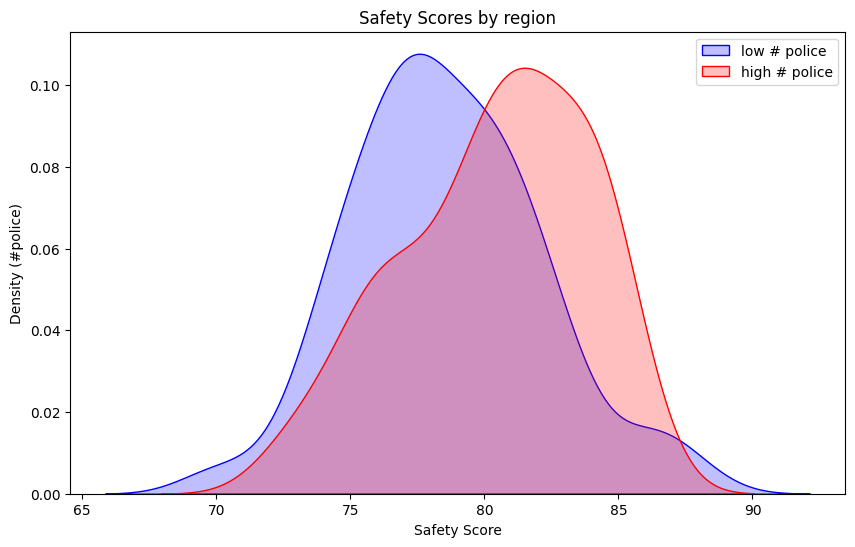

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(group_1['saftey_20'], shade=True, label='low # police', color='blue')
sns.kdeplot(group_2['saftey_20'], shade=True, label='high # police', color='red')
plt.title('Safety Scores by region')
plt.xlabel('Safety Score')
plt.ylabel('Density (#police)')
plt.legend()
plt.show()
